In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print("train shape: ", x_train.shape, "train label shape: ", t_train.shape)
print("test shape: ", x_test.shape, "test label shape: ", t_test.shape)

print("train label: ", t_train)
print("test label: ", t_test)

11490434/11490434 [==============================] - 0s 0us/step
train shape:  (60000, 28, 28) train label shape:  (60000,)
test shape:  (10000, 28, 28) test label shape:  (10000,)
train label:  [5 0 4 ... 5 6 8]
test label:  [7 2 1 ... 4 5 6]


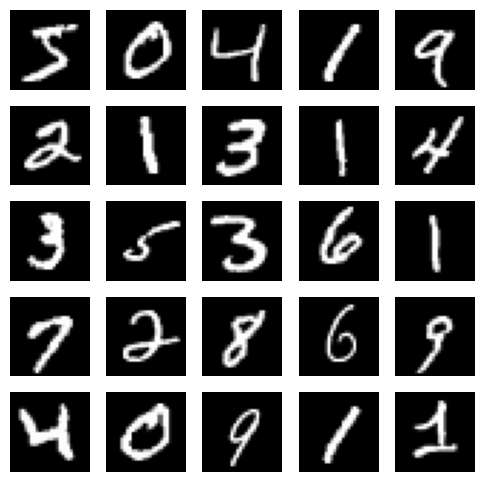

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for index in range(25): # 25 개 이미지 출력
  plt.subplot(5, 5, index + 1) # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')
  # plt.title(str(t_train[index]))

In [4]:
# 학습 데이터 / 테스트 데이터 정규화
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩 (One-Hot Encoding)
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_path = './modelchpoint_test.h5'

checkpoint = ModelCheckpoint(file_path, monitor='val_loss', save_best_only=True, mode='auto', verbose=1)
stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2, callbacks=[checkpoint, stopping])

Epoch 1/30
1497/1500 [============================>.] - ETA: 0s - loss: 0.2974 - accuracy: 0.9151
Epoch 1: val_loss improved from inf to 0.16923, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 9s 3ms/step - loss: 0.2971 - accuracy: 0.9152 - val_loss: 0.1692 - val_accuracy: 0.9528
Epoch 2/30
1497/1500 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9587
Epoch 2: val_loss improved from 0.16923 to 0.13097, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1388 - accuracy: 0.9587 - val_loss: 0.1310 - val_accuracy: 0.9613
Epoch 3/30
1486/1500 [============================>.] - ETA: 0s - loss: 0.0976 - accuracy: 0.9703
Epoch 3: val_loss improved from 0.13097 to 0.11406, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0975 - accuracy: 0.9703 - val_loss: 0.1141 - val_accuracy: 0.9671
Epoch 4/30
1498/1500 [================

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2, callbacks=[reduceLR])

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.1072 - val_accuracy: 0.9705 - lr: 0.0010
Epoch 2/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0918 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0978 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.1237 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 5/30
1491/1500 [============================>.] - ETA: 0s - loss: 0.0153 - accuracy: 0.9955
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.1131 - val_accuracy: 0.9732 - lr: 0.0010
Epoch 6/30
1500/1500 [==============================